In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


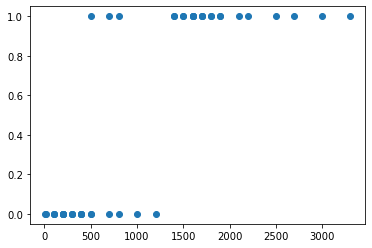

In [8]:
# Carregamento da base de dados e execlusão da primeira coluna
base = pd.read_csv('C:\\Users\\taynna.silva\\Temp Estudos\\Dados\\Eleicao.csv', sep = ';')
plt.scatter(base.DESPESAS, base.SITUACAO)
base.describe()

In [9]:
base

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300
5,Susan Sanders,0,200
6,Anthony Harris,1,1800
7,Philip Richardson,1,1700
8,Eugene Phillips,0,300
9,Mildred Morris,1,1800


In [3]:
#Visualização do coeficiente de correlação entre atributo "despesas" e "situação"
np.corrcoef(base.DESPESAS, base.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [4]:
#Criação das variáveis X e Y (variável independente e variável dependente)
# Transformando de X para o formato de matriz adicionando um novo eixo (newaxis)
X = base.iloc[:, 2].values
X = X[:, np.newaxis]
Y = base.iloc[:, 1].values
X

array([[  10],
       [ 100],
       [1600],
       [1500],
       [3300],
       [ 200],
       [1800],
       [1700],
       [ 300],
       [1800],
       [ 100],
       [ 500],
       [3000],
       [  20],
       [ 200],
       [ 700],
       [1600],
       [1900],
       [ 100],
       [ 400],
       [2700],
       [ 200],
       [ 300],
       [ 500],
       [2500],
       [1400],
       [ 700],
       [1700],
       [1400],
       [1600],
       [ 400],
       [ 200],
       [1600],
       [2200],
       [1900],
       [ 200],
       [1200],
       [1700],
       [1500],
       [2100],
       [ 400],
       [ 800],
       [ 400],
       [ 500],
       [1000],
       [ 300],
       [ 800]], dtype=int64)

In [5]:
#Criação do modelo, treinamento e visualização de coeficientes
modelo = LogisticRegression()
modelo.fit(X, Y)
modelo.coef_
modelo.intercept_

array([-4.60287217])

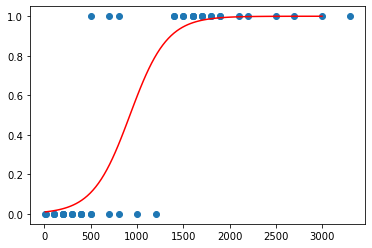

In [10]:
plt.scatter(X, Y)
# Geração de novos dados para gerar a função sigmoide
X_teste = np.linspace(10, 3000, 100)
# Implementação da função sigmoide
def model(x):
    return 1/ (1 +np.exp(-x))
# Geração de previsões (variável r) e visualização dos resultados
r = model(X_teste * modelo.coef_ + modelo.intercept_).ravel()
plt.plot(X_teste, r, color = 'red')

In [11]:
# Carregamento da base de dados com os novos candidatos
base_previsoes = pd.read_csv('C:\\Users\\taynna.silva\\Temp Estudos\\Dados\\NovosCandidatos.csv', sep = ';')
base_previsoes

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900
5,F,1500
6,G,3000


In [12]:
# Mudança dos dados para formato de matriz
despesas = base_previsoes.iloc[:, 1].values
despesas = despesas.reshape(-1, 1)
# Previsões e geração de nova base de dados com os valores originais e as previsões
previsoes_teste = modelo.predict(despesas)
previsoes_teste

array([0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [14]:
base_previsoes = np.column_stack((base_previsoes, previsoes_teste))
base_previsoes

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)